In [1]:
# Import all libraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
# Import dataset

filepath = 'housing_price_dataset.csv'
raw_df = pd.read_csv(filepath)

raw_df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [3]:
# Basic info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


**There is no null value so we don't have to do data cleaning.**

In [4]:
# Statistics about dataset

raw_df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


## Explorartory Data analysis

In [5]:
raw_df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

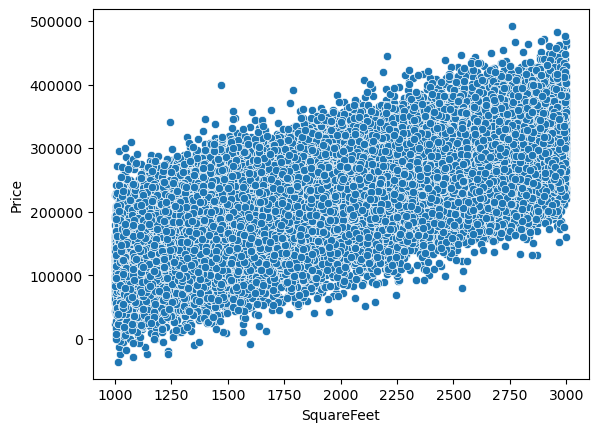

In [6]:
sns.scatterplot(data=raw_df, x='SquareFeet',y='Price');

**We can see a positive correlation between the squarefeet area and the Price.**

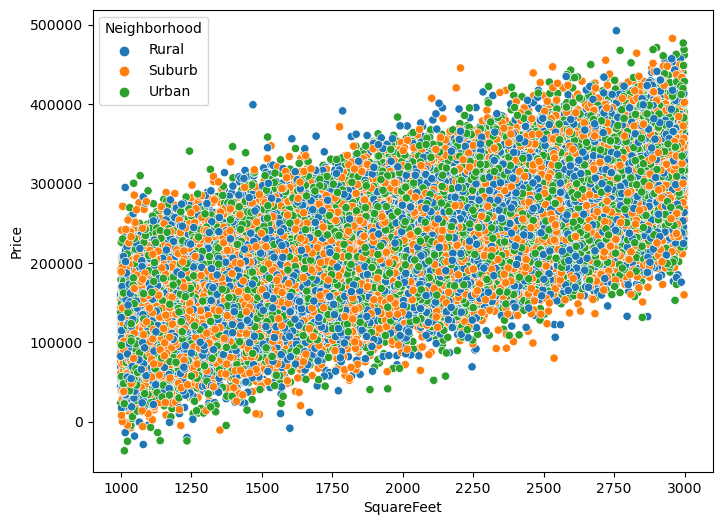

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(raw_df, x='SquareFeet',y='Price',hue='Neighborhood');

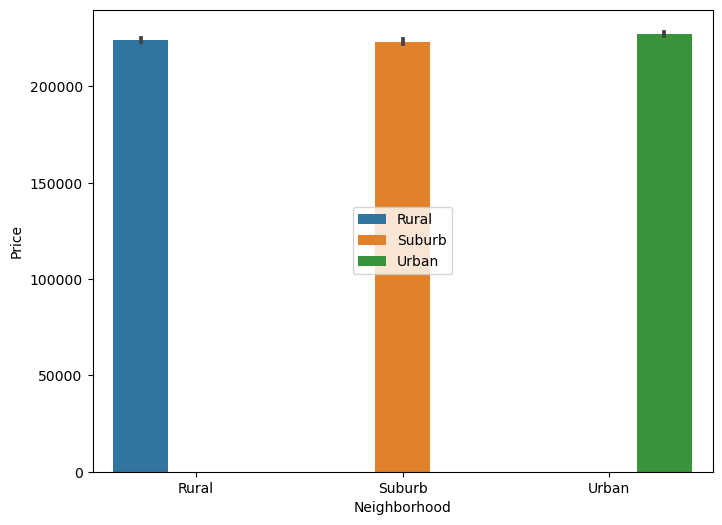

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(raw_df, x='Neighborhood',y='Price',hue='Neighborhood');
plt.legend(loc=10);

**There is a equal price distribution of data of Rural, Suburb and urban.**

c:\Users\MK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


225052.14 is the Median Price.


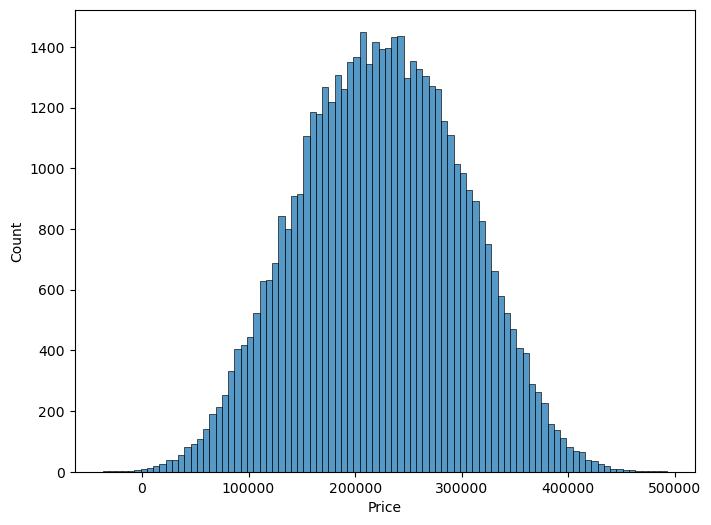

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(data=raw_df,x='Price');

median = np.median(raw_df['Price'])
print(f'{median:.2f} is the Median Price.')

- **The above Plot follows the Gaussian Distribution**
- **Median Price is 225052.14**

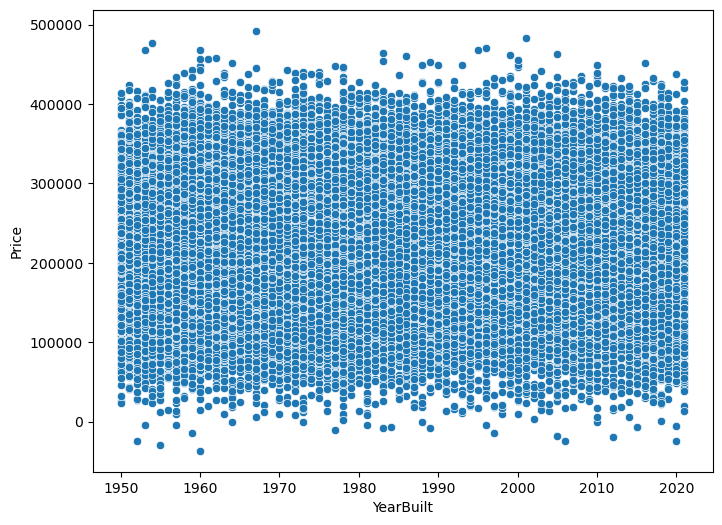

In [10]:
# Relationship between Yearbuilt and Price
plt.figure(figsize=(8,6))
sns.scatterplot(raw_df, x='YearBuilt',y='Price');

In [11]:
# Relationship between neighbourhood and price
neighbourhood_codes = {
    'Rural':0,
    'Suburb':1,
    'Urbun':2
}

mapping = raw_df['Neighborhood'].map(neighbourhood_codes)

raw_df['Price'].corr(mapping)


-0.005659063144989985

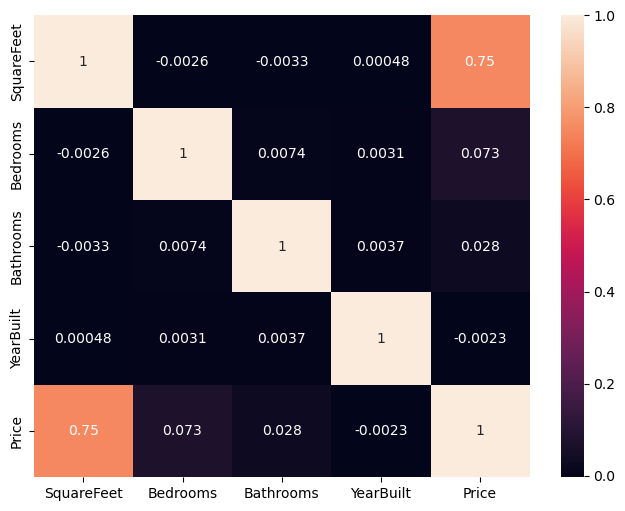

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(raw_df[raw_df.select_dtypes(include=np.number).columns.to_list()].corr(), annot=True);

## Training, Validation and Test Sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [15]:
print('train_df.shape : ',train_df.shape)
print('val_df.shape : ',val_df.shape)
print('test_df.shape : ',test_df.shape)

train_df.shape :  (30000, 6)
val_df.shape :  (10000, 6)
test_df.shape :  (10000, 6)


In [16]:
train_df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
29605,1481,4,3,Rural,2011,129669.303311
33044,1684,3,2,Urban,2018,154195.949628
16594,2485,4,1,Suburb,1961,158708.518632
21719,1411,4,1,Rural,2009,83306.488716
24972,2308,5,3,Suburb,2010,343440.837969


In [17]:
val_df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
30825,1339,3,3,Rural,1963,201489.818564
42564,1790,5,1,Rural,1990,232153.963786
16498,2774,4,3,Urban,1991,334436.925210
6597,1203,4,2,Suburb,1988,126764.189916
39137,2254,2,2,Rural,1955,304297.466559


In [18]:
test_df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
33553,1894,5,1,Rural,1975,170835.035713
9427,1001,5,3,Suburb,1963,126913.469998
199,2264,4,3,Suburb,1964,246611.883092
12447,2299,5,1,Suburb,1999,244250.462969
39489,2651,2,1,Suburb,1951,271127.650112


In [19]:
input_cols = list(train_df.columns)[:-1]
target_col = 'Price'

In [20]:
print(input_cols)

print(target_col)

['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt']
Price


Now we can create inputs and targets for the training, validation and test sets for further processing and model training.

In [21]:
#train_df
train_inputs = train_df[input_cols].copy()

train_targets = train_df[target_col].copy()

#val_df
val_inputs = val_df[input_cols].copy()

val_targets = val_df[target_col].copy()

#test_df
test_inputs = test_df[input_cols].copy()

test_targets = test_df[target_col].copy()

In [22]:
train_inputs.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
29605,1481,4,3,Rural,2011
33044,1684,3,2,Urban,2018
16594,2485,4,1,Suburb,1961
21719,1411,4,1,Rural,2009
24972,2308,5,3,Suburb,2010


In [23]:
train_targets.head()

29605    129669.303311
33044    154195.949628
16594    158708.518632
21719     83306.488716
24972    343440.837969
Name: Price, dtype: float64

In [24]:
# separate the data into numerical and categorical columns

numeric_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()

categorical_cols = train_inputs.select_dtypes('object').columns.to_list()

In [25]:
numeric_cols

['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']

In [26]:
categorical_cols

['Neighborhood']

In [27]:
train_inputs[numeric_cols].describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.888733,3.507300,2.002200,1985.367900
std,574.245857,1.114714,0.816834,20.710013
min,1000.000000,2.000000,1.000000,1950.000000
25%,1516.000000,3.000000,1.000000,1967.000000
50%,2011.000000,4.000000,2.000000,1985.000000
75%,2506.000000,5.000000,3.000000,2003.000000
max,2999.000000,5.000000,3.000000,2021.000000


In [28]:
raw_df[numeric_cols].describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420
std,575.513241,1.116326,0.815851,20.719377
min,1000.000000,2.000000,1.000000,1950.000000
25%,1513.000000,3.000000,1.000000,1967.000000
50%,2007.000000,3.000000,2.000000,1985.000000
75%,2506.000000,4.000000,3.000000,2003.000000
max,2999.000000,5.000000,3.000000,2021.000000


Let's use ```MinMaxScaler``` from ```sklearn.preprocessing``` to scale values to the (0,1) range.

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

First we ```fit``` the scaler to the data i.e. compute the range of values for each numeric column.

In [31]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [32]:
print('Minimum')
list(scaler.data_min_)

Minimum


[1000.0, 2.0, 1.0, 1950.0]

In [33]:
print('Maximum')
list(scaler.data_max_)

Maximum


[2999.0, 5.0, 3.0, 2021.0]

We can now saperately scale the training, validation and test sets using the transform method of scaler

In [34]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [35]:
train_inputs[numeric_cols].describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.504196,0.502433,0.501100,0.498139
std,0.287267,0.371571,0.408417,0.291690
min,0.000000,0.000000,0.000000,0.000000
25%,0.258129,0.333333,0.000000,0.239437
50%,0.505753,0.666667,0.500000,0.492958
75%,0.753377,1.000000,1.000000,0.746479
max,1.000000,1.000000,1.000000,1.000000


## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

In [36]:
raw_df[categorical_cols].nunique()

Neighborhood    3
dtype: int64

We can perform one hot encoding using the ```OneHotEncoder``` class from ```sklearn.preprocessing```.

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

First, we ```fit``` the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [39]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [40]:
encoder.categories_

[array(['Rural', 'Suburb', 'Urban'], dtype=object)]

We can generate column names for each individual category using ```get_feature_nmaes```.

In [41]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Neighborhood_Rural', 'Neighborhood_Suburb', 'Neighborhood_Urban']


All of the above columns will be added to train_inputs, val_inputs and test_inputs.

To perform the encoding, we use the transform method of encoder.

In [42]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [43]:
train_inputs[encoded_cols]

,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
29605,1.0,0.0,0.0
33044,0.0,0.0,1.0
16594,0.0,1.0,0.0
21719,1.0,0.0,0.0
24972,0.0,1.0,0.0
...,...,...,...
27517,0.0,0.0,1.0
28392,1.0,0.0,0.0
5776,1.0,0.0,0.0
24864,1.0,0.0,0.0


In [44]:
test_inputs.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
33553,0.447224,1.000000,0.0,Rural,0.352113,1.0,0.0,0.0
9427,0.000500,1.000000,1.0,Suburb,0.183099,0.0,1.0,0.0
199,0.632316,0.666667,1.0,Suburb,0.197183,0.0,1.0,0.0
12447,0.649825,1.000000,0.0,Suburb,0.690141,0.0,1.0,0.0
39489,0.825913,0.000000,0.0,Suburb,0.014085,0.0,1.0,0.0


In [66]:
test_inputs.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Neighborhood_Rural', 'Neighborhood_Suburb', 'Neighborhood_Urban'],
      dtype='object')

In [45]:
val_inputs.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
30825,0.169585,0.333333,1.0,Rural,0.183099,1.0,0.0,0.0
42564,0.395198,1.000000,0.0,Rural,0.563380,1.0,0.0,0.0
16498,0.887444,0.666667,1.0,Urban,0.577465,0.0,0.0,1.0
6597,0.101551,0.666667,0.5,Suburb,0.535211,0.0,1.0,0.0
39137,0.627314,0.000000,0.5,Rural,0.070423,1.0,0.0,0.0


In [46]:
train_inputs.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
29605,0.240620,0.666667,1.0,Rural,0.859155,1.0,0.0,0.0
33044,0.342171,0.333333,0.5,Urban,0.957746,0.0,0.0,1.0
16594,0.742871,0.666667,0.0,Suburb,0.154930,0.0,1.0,0.0
21719,0.205603,0.666667,0.0,Rural,0.830986,1.0,0.0,0.0
24972,0.654327,1.000000,1.0,Suburb,0.845070,0.0,1.0,0.0


## Training a Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

We can train the model using ```model.fit```.

In [49]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LinearRegression()

Let's check the weights and biases of the trained model.

In [50]:
print(numeric_cols + encoded_cols)

['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Neighborhood_Rural', 'Neighborhood_Suburb', 'Neighborhood_Urban']


In [51]:
print(model.coef_.tolist())

[198922.9268542532, 19251.189226150535, 6053.916677928648, -689.6471563618406, 4.528692062297167e+17, 4.5286920622972026e+17, 4.528692062297197e+17]


In [52]:
print(model.intercept_)

-4.5286920622960666e+17


Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

In [53]:
weight_df = pd.DataFrame({
    'Feature': (numeric_cols + encoded_cols),
    'weights':model.coef_.tolist()
})

In [54]:
weight_df

,Feature,weights
0,SquareFeet,1.989229e+05
1,Bedrooms,1.925119e+04
2,Bathrooms,6.053917e+03
3,YearBuilt,-6.896472e+02
4,Neighborhood_Rural,4.528692e+17
5,Neighborhood_Suburb,4.528692e+17
6,Neighborhood_Urban,4.528692e+17


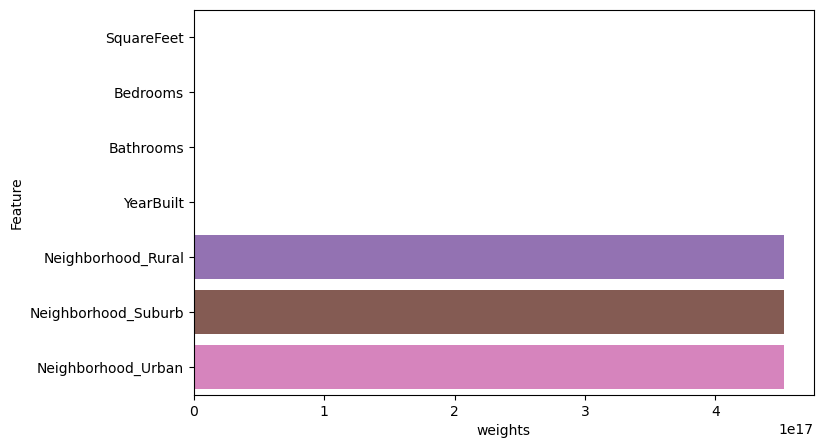

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(data=weight_df, x='weights',y='Feature');

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test 

In [56]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [57]:
train_preds = model.predict(X_train)

In [58]:
train_preds

array([176192., 189888., 274112., ..., 250752., 285952., 214464.])

In [59]:
train_targets

29605    129669.303311
33044    154195.949628
16594    158708.518632
21719     83306.488716
24972    343440.837969
             ...      
27517    234661.043176
28392    310803.408597
5776     174156.691462
24864    197432.259436
7756     221960.309875
Name: Price, Length: 30000, dtype: float64

In [60]:
# Root mean squared error
def rmse(targets, predications):
    return np.sqrt(np.mean(np.square(targets - predications)))

In [61]:
rmse(train_targets, train_preds)

50209.99818458967

In [62]:
# Training data
model.score(X_train,train_targets)

0.5670972509487555

In [63]:
# Validation data
model.score(X_val,val_targets)

0.5710378664207005

In [64]:
# Test data
model.score(X_test,test_targets)

0.5741967579578385

In [65]:
import numpy as np
import joblib  # For saving and loading the model
from sklearn.metrics import mean_squared_error
import os

# Define RMSE function
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

# Split data
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Predictions and evaluations
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

train_rmse = rmse(train_targets, train_preds)
val_rmse = rmse(val_targets, val_preds)
test_rmse = rmse(test_targets, test_preds)

print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Test RMSE: {test_rmse}")

# Model scores
print("Model Score (Training):", model.score(X_train, train_targets))
print("Model Score (Validation):", model.score(X_val, val_targets))
print("Model Score (Test):", model.score(X_test, test_targets))

# Save the trained model
model_file_path = "trained_model.pkl"
joblib.dump(model, model_file_path)
print(f"Model saved to {model_file_path}")

# To reuse the model in a Streamlit app
# Load the model
if os.path.exists(model_file_path):
    loaded_model = joblib.load(model_file_path)
    print("Model loaded successfully.")

    # Example usage of loaded model
    new_predictions = loaded_model.predict(X_test)  # Example prediction
    print(f"RMSE on loaded model: {rmse(test_targets, new_predictions)}")
else:
    print(f"Model file not found at {model_file_path}.")


Training RMSE: 50209.99818458967
Validation RMSE: 49778.56568823873
Test RMSE: 49437.74621392677
Model Score (Training): 0.5670972509487555
Model Score (Validation): 0.5710378664207005
Model Score (Test): 0.5741967579578385
Model saved to trained_model.pkl
Model loaded successfully.
RMSE on loaded model: 49437.74621392677
